## Task5(2天)】PyTorch实现L1，L2正则化以及Dropout(给代码截图参考)
1. 了解知道Dropout原理
2. 用代码实现正则化(L1、L2、Dropout）
3. Dropout的numpy实现
4. PyTorch中实现dropout

1. 了解Dropout原理

Dropout主要产生的原因就是在神经网络训练的过程中参数太多了，而训练样本又太少，这样很容易出现过拟合状态。*过拟合*是指在训练集上表现的很好，loss很低。但是在测试集上表现很差。过拟合问题是重中之重，因为机器学习算法面对的就是真实数据。

> 机器学习的两大问题：
> 1. 容易过拟合
> 2. 训练时间长

Dropout就是在训练的过程中随机忽略P（概率）的神经元，只对剩下的的神经元进行训练，可以明显的的减少过拟合现象。这样做的方法可以有效的减少神经元的相互做用，也可以让神经元不会过分依赖某一个神经元。

剩余的神经元流程就跟原来的训练过程一样，wx+b使用反向传递来更新参数。

例如，p选择0.4，假设我们有1000个神经元，dropout会随机将500个神经元置0.其实这里我们的输出需要乘1/(1-p)

2. 用代码实现正则化(L1、L2、Dropout）

L1正则 

In [2]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [96]:
N_SAMPLES = 10
N_HIDDEN = 300

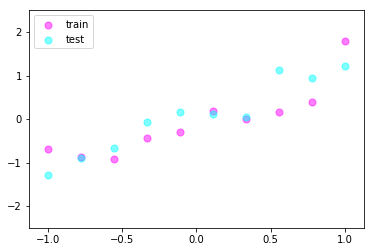

In [97]:
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
y = x + 0.35*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

# test data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = test_x + 0.35*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

# show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()
# x = x.cuda()
# y = y.cuda()
# test_x = test_x.cuda()
# test_y = test_y.cuda()

In [27]:
a = np.arange(5)-4
# b = a.reshape(3,3)
a

array([-4, -3, -2, -1,  0])

L1 distance 
:math:`||A||_F = [\sum_{i,j} abs(a_{i,j})^2]^{1/2}`


In [28]:
for i in range(len(a)):
    L1 = np.sum(np.abs(a-a[i]))
    print(L1)

print(L1)


10
7
6
7
10
10


In [37]:
# numpy 中自带的方法

np.linalg.norm(a,ord=1)

10.0

L2 distance

In [31]:
for i in range(len(a)):
    L2 = np.sqrt(np.sum(np.square(a-a[i])))
    print(L2)

5.477225575051661
3.872983346207417
3.1622776601683795
3.872983346207417
5.477225575051661


In [36]:
# numpy 中自带的方法
np.linalg.norm(a)

5.477225575051661

numpy实现dropout

In [49]:
# 定义一点数据
a1 = np.arange(20)
a1 = a1.reshape((5,4)).astype(np.float)
a1

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]])

In [54]:
keep_prob = 0.9
d3 = np.random.rand(a1.shape[0], a1.shape[1])<keep_prob
d3
# 获取dropout的矩阵

array([[ True, False,  True,  True],
       [ True,  True, False,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [55]:
a1 =np.multiply(a1,d3)
a1

array([[ 0.        ,  0.        ,  2.4691358 ,  3.7037037 ],
       [ 4.9382716 ,  6.17283951,  0.        ,  8.64197531],
       [ 9.87654321, 11.11111111, 12.34567901, 13.58024691],
       [14.81481481, 16.04938272, 17.28395062, 18.51851852],
       [19.75308642, 20.98765432, 22.22222222, 23.45679012]])

In [56]:
a1/=keep_prob # 最后需要除以keep_prob 输出大小不变
a1

array([[ 0.        ,  0.        ,  2.74348422,  4.11522634],
       [ 5.48696845,  6.85871056,  0.        ,  9.60219479],
       [10.9739369 , 12.34567901, 13.71742112, 15.08916324],
       [16.46090535, 17.83264746, 19.20438957, 20.57613169],
       [21.9478738 , 23.31961591, 24.69135802, 26.06310014]])

在 pytorch 中实现 Dropout
其实在 pytorch中有一个类可以直接使用dropout的方法
nn.Dropout

In [92]:
nn_dropout = torch.nn.Sequential(
    torch.nn.Linear(1,N_HIDDEN),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,N_HIDDEN),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,1)
)
# nn_dropout.cuda()
print(nn_dropout)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [93]:
optimizer = torch.optim.Adam(nn_dropout.parameters(),lr=0.001)
loss_func = torch.nn.MSELoss()


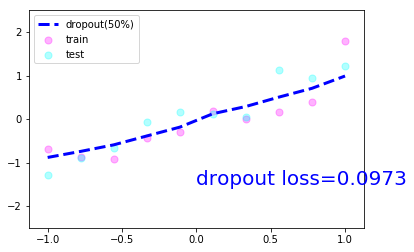

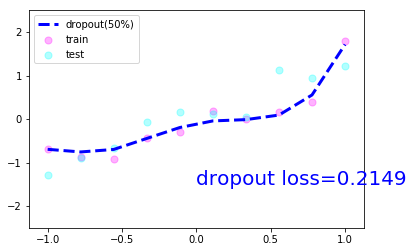

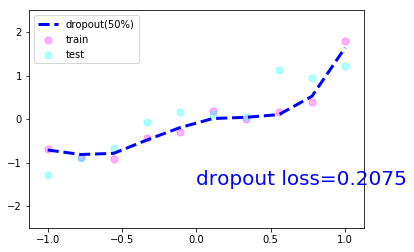

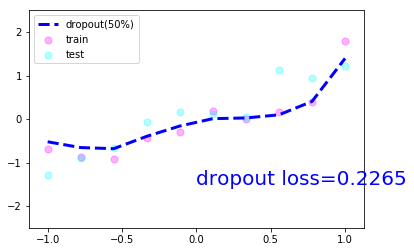

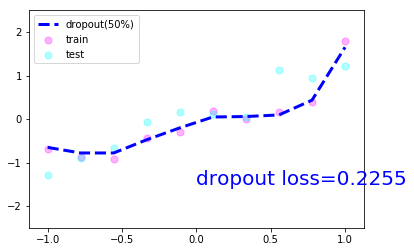

In [98]:
for epoch in range(500):
    
    pred_out = nn_dropout(x)
    loss = loss_func(pred_out,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 ==0:
        
        nn_dropout.eval()  # parameters for dropout differ from train mode

        # plotting
        plt.cla()
        test_pred_drop = nn_dropout(test_x)
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.cpu().numpy(), c='cyan', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_drop, test_y).data.numpy(), fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5));plt.pause(0.1)

        # change back to train mode
        nn_dropout.train()

plt.ioff()
plt.show()
        